Name: AVIK MONDAL  
UMID: 11062225  
Physics 510

In [4]:
import numpy as np
import time
import matplotlib as mpl
import matplotlib.pyplot as plt


#necessary libraries

In [160]:
def generateIC(size): # generates initial 1D Ising condition (give tuple)
    X = np.random.randint(0,2,[size[0],size[1]]) # 1D initial condition
    for j in range(len(X[:,0])):
        for i in range(len(X[j,:])):
            if (X[j,i] < 1):
                X[j,i] = -1
            else:
                X[j,i] = 1
    return X

def calculate2DIsingHamiltonian(X):
    H = 0
    xlen = X.shape[0]
    ylen = X.shape[1]
    for i in range(xlen):
        for j in range(ylen):
            spin_current = X[i,j]
            if (j+1 == ylen):
                spin_right = X[i,0]
            else:
                spin_right = X[i, j+1]
            if (i+1 == xlen):
                spin_down = X[0, j]
            else:
                spin_down = X[i+1,j]
            H -= spin_current *(spin_right + spin_down)
    return H

def calculate2DIsingHamiltonianPerturbation(X, xpos, ypos, spin_old,spin_new):
    xlen = X.shape[0]
    ylen = X.shape[0]
    if (xpos + 1 == xlen):
        spin_right = X[0,ypos]
    else:
        spin_right = X[xpos+1,ypos]
    if ((xpos - 1) < 0):
        spin_left = X[xlen-1,ypos]
    else:
        spin_left = X[xpos-1,ypos]
    if ((ypos + 1) == ylen):
        spin_down = X[xpos, 0]
    else:
        spin_down = X[xpos, ypos+1]
    if ((ypos - 1) == -1):
        spin_up = X[xpos, ylen-1]
    else:
        spin_up = X[xpos, ypos-1]
    Hold = spin_old * -1*(spin_right + spin_left+spin_down+spin_up)
    Hnew = spin_new * -1*(spin_right + spin_left+spin_down+spin_up)
    return Hnew - Hold

# returns both the final iteration and the perturbation after one metropolis hastings iteration
def metropolisHastingsIterator2D(initial,T):
    Xinit = initial
    
    #Hinit = calculate2DIsingHamiltonian(Xinit)
    #pick random lattice site
    rando_x = np.random.randint(0, Xinit.shape[0]) 
    rando_y = np.random.randint(0, Xinit.shape[1])
        #generate potential next condition
        #Xnext = np.copy(Xinit)
    #Xinit[rando_x, rando_y] = Xinit[rando_x,rando_y]*-1
        # calculate hamiltonian of next condition
    spin_old = Xinit[rando_x, rando_y]
    spin_new = Xinit[rando_x, rando_y]*-1
    perturb = calculate2DIsingHamiltonianPerturbation(Xinit,rando_x, rando_y, spin_old, spin_new)
        
        # calculate exponent of partition function (canonical distribution)
    partitionExp =  perturb/T
        #calculate acceptance ratio
    acceptRatio = 0
    if (np.exp(-1*partitionExp) >= 1):
        acceptRatio = 1
    else:
        acceptRatio = np.exp(-1*partitionExp)
        # calculate whether we accept or not
    acceptTestVal = np.random.random(1)
    if (acceptTestVal <= acceptRatio):
        Xinit[rando_x, rando_y] = Xinit[rando_x,rando_y]*-1
        p = perturb
    else:
        p = 0
    return Xinit, p


In [162]:
X = np.ones((50,50))

print(calculate2DIsingHamiltonianPerturbation(X,0, 0, -1, 1))
calculate2DIsingHamiltonian(np.ones((50,50)))

-8.0


-5000.0

In [165]:
def findMagnetization(X):
    N = X.shape[0]*X.shape[1]
    return np.sum(X) / N


In [166]:
start = time.time()
Ndim = 50
N = Ndim**2
Tlow = 1.0
Thigh = 3.6
Tinterval = Thigh-Tlow
Tarraysize = int(Tinterval*10.0)
mcsteps = 1000000 #1000000
Temp = np.zeros((Tarraysize,1))
Cv = np.zeros((Tarraysize,1))
m = np.zeros((Tarraysize,1))
H2mean = np.zeros((Tarraysize,1))
Hmean = np.zeros((Tarraysize,1))

for tupdate in range(0,Tarraysize):
    X = np.ones((Ndim,Ndim))
    E = -5000.0
    H = np.zeros((int(mcsteps/2),1))
    H2 = np.zeros((int(mcsteps/2),1))
    for iter in range(0, mcsteps):
        X, p = metropolisHastingsIterator2D(X, tupdate/10.0 + 1.0)
        E+=p
        if (iter >= mcsteps/2):
            H[iter - int(mcsteps/2), 0] = E
            H2[iter - int(mcsteps/2), 0] = E**2
    H2mean[tupdate, 0]  = np.mean(H2)
    Hmean[tupdate,0] = np.mean(H)**2
    Cv[tupdate, 0] = ( np.mean(H2) - np.mean(H)**2 ) / (N * (tupdate/10.0 + 1.0)**2 )
    m[tupdate,0] = findMagnetization(X)
    Temp[tupdate,0] = tupdate/10.0 + 1.0
end = time.time()
print(end - start)
    

326.30720567703247


Text(0.5,1,'Mean Squared')

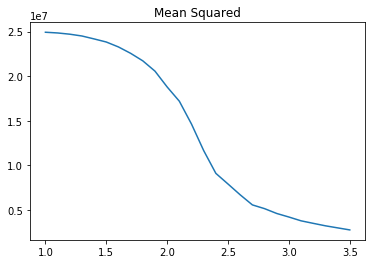

In [171]:
plt.plot(Temp, H2mean)
plt.title('Mean Squared')

Text(0.5,1,'Squared Mean')

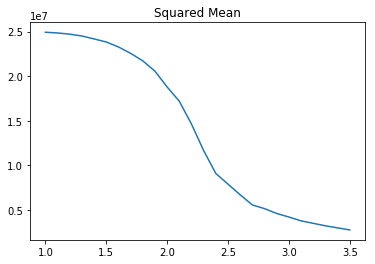

In [172]:
plt.plot(Temp,Hmean)
plt.title('Squared Mean')

Text(0.5,1,'Specific Heat')

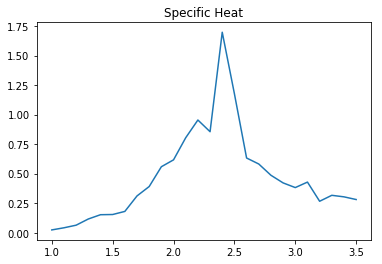

In [173]:
plt.plot(Temp, Cv)
plt.title('Specific Heat')

Text(0.5,1,'Order Parameter')

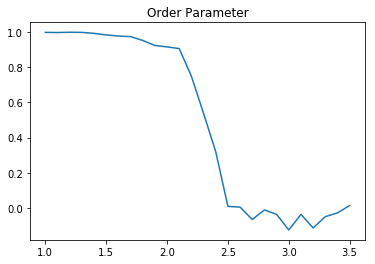

In [174]:
plt.plot(Temp,m)
plt.title('Order Parameter')